### 정형 데이터와 비정형 데이터  
여태 다루었던 데이터를 되돌아 보자. 4장 까지는 생선의 길이, 높이, 무게 등을 데이터로 사용하였고 이 데이터는 CSV 파일에 정리되어 있었다. 또한 이번 장에서 사용한 와인 데이터도 CSV 파일이었다.  
  
이런 형태의 데이터를 **정형 데이터(structured data)**라고 부른다. 쉽게 말해 어떤 구조로 되어 있다는 의미이다. 이런 데이터는 CSV나 데이터베이스, 혹은 엑셀에 저장하기 쉽다.  
온라인 쇼핑몰에 진열된 상품과 구매한 쇼핑 정보는 모두 데이터베이스에 저장되는 정형 데이터에 속한다.  
  
정형 데이터의 반대도 존재한다. 이와 반대되는 데이터를 **비정형 데이터(unstructured data)**라고 부른다.  
  
비정형 데이터는 데이터베이스나 엑셀로 표현하기 어려운 것들이다. 책의 글과 같은 텍스트 데이터, 디지털 카메라로 찍은 사진, 디지털 음악 등이 있다.

다만 텍스트나 사진을 데이터베이스에 저장할 수 없는 것은 아니다. 데이터베이스 중에는 구조적이지 않은 데이터를 저장하는 데 편리하도록 발전한 것이 많다. 대표적으로 NoSQL 데이터베이스는 엑셀이나 CSV에 담기 어려운 텍스트나 JSON 데이터를 저장하는 데 용이하다.

지금까지 배운 머신러닝 알고리즘은 정형 데이터에 잘 맞는다. 그중에 정형 데이터를 다루는 데 가장 뛰어난 성과를 내는 알고리즘이 **앙상블 학습(ensemble learning)**이다. 이 알고리즘은 대부분 결정 트리를 기반으로 만들어져 있다. 바로 이 절에서 배울 알고리즘들이 앙상블 학습에 속한다.  
  
그럼 비정형 데이터는 어떤 알고리즘을 사용해야 할까? 7장에서 배울 신경망 알고리즘이다. 비정형 데이터는 규칙성을 찾기 어려워 전통적인 머신러닝 방법으로는 모델을 만들기 까다롭다. 하지만 신경망 알고리즘을 통해 사진을 인식하고 텍스트를 이해하는 모델을 만들 수 있다.  
  
사이킷런에서 제공하는 정형 데이터의 가장 성능이 좋은 앙상블 학습 알고리즘을 알아보자.

### 랜덤 포레스트  
**랜덤 포레스트(Random Forest)**는 앙상블 학습의 대표 주자 중 하나로 안정적인 성능 덕분에 널리 사용되고 있다. 앙상블 학습을 적용할 때 가장 먼저 랜덤 포레스트를 시도해 보는 것을 권한다.  
  
이름으로 유추할 수 있듯이 랜덤 포레스트는 결정 트리를 랜덤하게 만들어 결정 트리(나무) 숲을 만든다. 그리고 각 결정 트리의 예측을 사용해 최종 예측을 만든다.  
그러면 랜덤 포레스트가 어떻게 숲을 구성하는지 알아보자.  
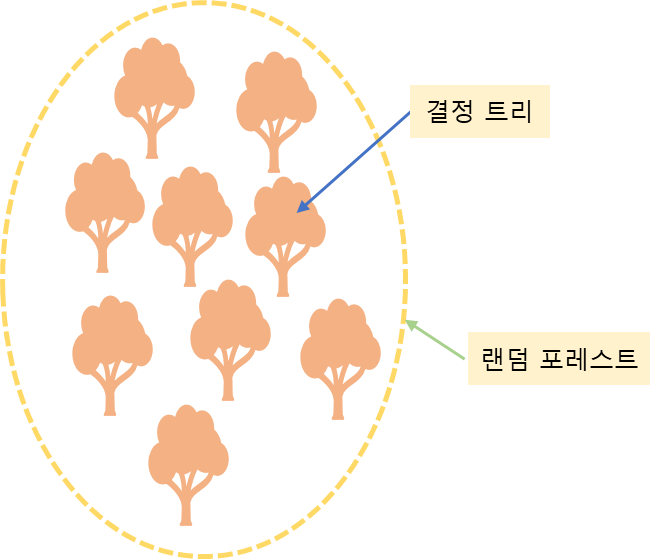

랜덤 포레스트는 각 트리를 훈련하기 위한 데이터를 랜덤하게 만드는데, 이 데이터를 만드는 방법이 독특하다. 입력한 훈련 데이터에서 랜덤하게 샘플을 추출하여 훈련 데이터를 만든다. 이때 한 샘플이 중복되어 추출될 수도 있다.  
  
예를 들어 1000개 가방에서 100개씩 샘플을 뽑는다면 먼저 1개를 뽑고, 뽑았던 1개를 다시 가방에 넣는다. 이런 식으로 계속해서 100개를 가방에서 뽑으면 중복된 샘플을 뽑을 수 있다.  
이렇게 만들어진 샘플을 **부트스트랩 샘플(bootstrap sample)**이라고 한다.  
기본적으로 부트스트랩 샘플은 훈련 세트의 크기와 같게 만든다. 1000개 가방에서 중복하여 1000개의 샘플을 뽑기 때문에 부트스트랩 샘플은 훈련 세트와 크기가 같다.  
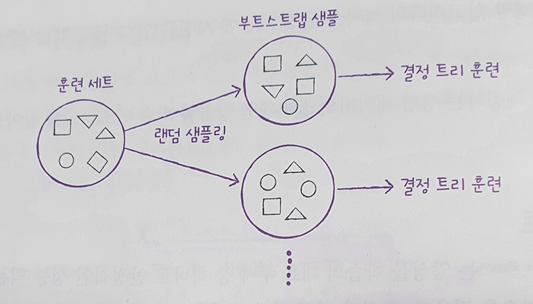

**부트스트랩이란?**  
데이터 세트에서 중복을 허용하여 데이터를 샘플링 하는 방식을 의미한다. 본문에서 설명한 것 처럼 가방에 1000개의 샘플이 있을 때 먼저 1개를 뽑고, 다시 가방에 넣어 그다음 샘플을 뽑는 방식을 뜻한다.  
부트스트랩 샘플이란 결국 부트스트랩 방식으로 샘플링하여 분류한 데이터라는 의미이다.

각 노드를 분할할 때 전체 특성 중에서 일부 특성을 무작위로 고른 다음 이 중에서 최선의 분할을 찾는다. 분류 모델인 RandomForestClassifier는 기본적으로 전체 특성 개수의 제곱근만큼의 특성을 선택한다. 즉 4개의 특성이 있다면 노드마다 2개를 랜덤하게 선택하여 사용한다. 다만 회귀 모델인 RandomForestRegressor는 전체 특성을 사용한다.  
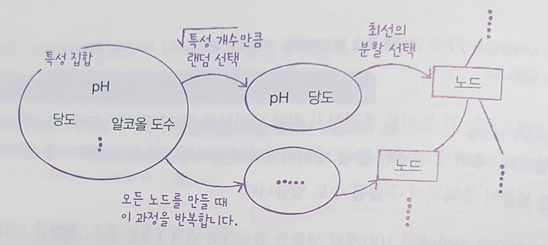  
  
사이킷런의 랜덤 포레스트는 기본적으로 100개의 결정 트리를 이런 방식으로 훈련한다. 그다음 분류일 때는 각 트리의 클래스별 확률을 평균하여 가장 높은 확률을 가진 클래스를 예측으로 삼는다. 회귀일 때는 단순히 각 트리의 예측을 평균한다.

분류와 회귀?  
지도 학습 알고리즘을 다루면서 분류와 회귀를 알아 보았다. 분류는 샘플을 몇 개의 클래스 중 하나로 분류하는 문제고, 회귀는 임의의 어떤 숫자를 예측하는 문제였다.

랜덤 포레스트는 랜덤하게 선택한 샘플과 특성을 사용하기 때문에 훈련 세트에 과대적합되는 것을 막아주고 검증 세트와 테스트 세트에서 안정적인 성능을 얻을 수 있다. 종종 기본 매개변수 설정만으로 좋은 결과를 낼 수 있다.

사이킷런의 RandomForestClassifier 클래스를 화이트 와인을 분류하는 문제에 적용해 보자.  
이전 절에서 했던 것처럼 와인 데이터셋을 판다스로 불러오고 훈련 세트와 테스트 세트로 나눈다.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42)

cross_validate() 함수를 사용해 교차 검증을 수행해 보자. RandomForestClassifier는 기본적으로 100개의 결정 트리를 사용하므로 n_jobs = -1로 설정한다.  
cross_validate() 함수의 n_jobs 매개변수도 -1로 지정하여 병렬로 교차검증을 수행한다. return_train_score 매개변수를 True로 지정하면 검증 검수뿐만 아니라 훈련 세트에 대한 점수도 같이 반환한다. 훈련 세트와 검증 세트의 점수를 비교하면 과대적합을 파악하는 데 용이하다.

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs = -1, random_state = 42)
scores = cross_validate(rf, train_input, train_target, return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


훈련 세트에 과대적합된 것으로 보인다.

랜덤 포레스트는 결정 트리의 앙상블이기 때문에 DecisionTreeClassifier가 제공하는 주요 매개변수를 모두 제공한다. criterion, max_dapth, max_features, min_samples_split, min_impurity_decrease, min_samples_leaf 등이다.  
또한 결정 트리의 큰 장점 중 하나인 특성 중요도를 계산한다. 랜덤 포레스트의 특성 중요도는 각 결정 트리의 특성 중요도를 취합한 것이다.  
앞의 랜덤 포레스트 모델을 훈련 세트에 훈련한 후 특성 중요도를 출력해 보자.

In [3]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


앞서 1절 '결정 트리'에서 만든 특성 중요도와 비교해 보자. 결정 트리에서의 특성 중요도는 아래와 같았다. [0.12345626    0.86862934    0.0079144]

각각 [알코올 도수, 당도, pH]였는데 두 번째 특성인 당도의 중요도가 감소하고 알코올 도수와 pH 특성의 중요도가 상승하였다. 이런 이유는 랜덤 포레스트가 특성의 일부를 랜덤하게 선택하여 결정 트리를 훈련하기 때문이다.  
그 결과 하나의 특성에 과도하게 집중하지 않고 좀 더 많은 특성이 훈련에 기여할 기회를 얻는다. 이는 과대적합을 줄이고 일반화 성능을 높이는 데 도움이 된다.

RandomForestClassifier에는 자체적으로 모델을 평가하는 점수를 얻을 수 있는 기능이 있다. 랜덤 포레스트는 훈련 세트에서 중복을 허용하여 부트스트랩 샘플을 만들어 결정 트리를 훈련한다고 했다. 이때 부트스트랩 샘플에 포함되지 않고 남는 샘플이 있다. 이런 샘플을 OOB(out of bag) 샘플이라고 한다.  
이 남는 샘플을 사용하여 부트스트랩 샘플로 훈련한 결정 트리를 평가할 수 있다. 마치 검증 세트의 역할을 하는 것이다.

이 점수를 얻으려면 RandomForestClassifier 클래스의 oob_score 매개변수를 True로 지정해야 한다. 이렇게 하면 랜덤 포레스트는 각 결정 트리의 OOB 점수를 평균하여 출력한다. oob_score = True로 지정하고 모델을 훈련하여 OOB 점수를 출력해 보자.

In [4]:
rf = RandomForestClassifier(oob_score = True, n_jobs = -1, random_state = 42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


### 엑스트라 트리  
**엑스트라 트리(Extra Trees)**는 랜덤 포레스트와 매우 비슷하게 동작한다. 기본적으로 100개의 결정 트리를 훈련한다. 랜덤 포레스트와 동일하게 결정 트리가 제공하는 대부분의 매개변수를 지원한다. 또한 전체 특성 중에 일부 특성을 랜덤하게 선택하여 노드를 분할하는 데 사용한다.  
  
랜덤 포레스트와 엑스트라 트리의 차이점은 부트스트랩 샘플을 사용하지 않는다는 점이다. 즉 각 결정 트리를 만들 때 전체 훈련 세트를 사용한다. 대신 노들르 분할할 때 가장 좋은 분할을 찾는 것이 아니라 무작위로 분할한다.  
2절의 확인 문제에서 DecisionTreeClassifier의 splitter 매개변수를 'random'으로 지정했었는데 엑스트라 트리가 사용하는 결정 트리가 바로 splitter = 'random'인 결정 트리이다.  
  
하나의 결정 트리에서 특성을 무작위로 분할한다면 성능이 낮아지겠지만 많은 트리를 앙상블 하기 때문에 과대적합을 막고 검증 세트의 점수를 높이는 효과가 있다.  
사이킷런에서 제공하는 엑스트라 트리는 ExtraTreesClassifier이다. 이 모델의 교차 검증 점수를 확인해 보자.

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs = -1, random_state = 42)
scores = cross_validate(et, train_input, train_target, return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))


0.9974503966084433 0.8887848893166506


랜덤 포레스트와 비슷한 결과를 얻었다. 이 예제는 특성이 많지 않아 두 모델의 차이가 크지 않다. 보통 엑스트라 트리가 무작위성이 좀 더 크기 때문에 랜덤 포레스트보다 더 많은 결정 트리를 훈련해야 한다. 하지만 랜덤하게 노드를 분할하기 때문에 빠른 계산 속도가 엑스트라 트리의 장점이다.

결정 트리는 최적의 분할을 찾는 데 시간을 많이 소모한다. 특히 고려해야 할 특성의 개수가 많을 때 더 그렇다. 만약 무작위로 나눈다면 훨씬 더 빨리 트리를 구성할 수 있다.  
  
엑스트라 트리도 랜덤 포레스트와 마찬가지로 특성 중요도를 제공한다. 순서는 [alcohol, sugar, pH]인데 결과를 보면 엑스트라 트리도 결정 트리보다 sugar에 대한 의존성이 작다.

In [6]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


엑스트라 트리의 회귀 버전은 ExtraTreesRegressor 클래스이다.  
랜덤 포레스트와 엑스트라 트리에 대해 알아보았다. 이 둘과 다른 방식을 사용하는 앙상블 학습을 알아보자.

### 그레이디언트 부스팅  
**그레이디언트 부스팅(gradient boosting)**은 깊이가 얕은 결정 트리를 사용하여 이전 트리의 오차를 보완하는 방식으로 앙상블 하는 방법이다.  
사이킷런의 GradientBoostingClassifier는 기본적으로 깊이가 3인 결정 트리를 100개 사용한다. 깊이가 얕은 결정 트리를 사용하기 때문에 과대적합에 강하고 일반적으로 높은 일반화 성능을 가진다.  
  
그레이디언트라는 이름에서 유추할 수 있듯이 4장에서 배웠던 경사하강법을 사용하여 트리를 앙상블에 추가한다. 분류에서는 로지스틱 손실 함수를 사용하고 회귀에서는 평균 제곱 오차 함수를 사용한다.

경사 하강법은 손실 함수를 산으로 정의하고 가장 낮은 곳을 찾아 내려오는 과정으로 설명되었다. 이때 가장 낮은 곳을 찾아 내려오는 방법은 모델의 가중치와 절편을 조금씩 바꾸는 것이다.  
그레이디언트 부스팅은 결정 트리를 계속 추가하면서 가장 낮은 곳을 찾아 이동한다. 손실 함수의 낮은 곳으로 천천히 조금씩 이동해야 하기 때문에 깊이가 얕은 트리를 사용한다. 또한 학습률 매개변수로 속도를 조절할 수 있다.  
  
이제 사이킷런에서 제공하는 GradientBoostingClassifier를 사용해 와인 데이터셋의 교차 검증 점수를 확인해 보자.

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state = 42)
scores = cross_validate(gb, train_input, train_target, return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


과대적합이 되지 않은 점수가 도출되었다. 그레이디언트 부스팅은 결정 트리의 개수를 늘려도 과대적합에 매우 강하다. 학습률을 증가시키고 트리의 개수를 늘리면 조금 더 향상이 가능하다.

In [8]:
gb = GradientBoostingClassifier(n_estimators = 500, learning_rate  = 0.2, random_state = 42)
scores = cross_validate(gb, train_input, train_target, return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


결정 트리의 개수를 500개로 늘렸지만 과대적합을 잘 억제하고 있다. 학습률 learning_rate의 기본값은 0.1이다. 그레이디언트 부스팅도 특성 중요도를 제공한다. 결과에서 볼 수 있듯이 그레이디언트 부스팅이 랜덤 포레스트보다 일부 특성(sugar)에 더 집중한다.

In [9]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68011572 0.16116151]


트리 훈련에 사용할 훈련 세트의 비율을 정하는 subsample이라는 매개변수가 있다. 이 매개변수의 기본값은 1.0으로 전체 훈련 세트를 사용한다. 하지만 subsample이 1보다 작으면 훈련 세트의 일부를 사용한다.  
이는 마치 경사 하강법 단계마다 일부 샘플을 랜덤하게 선택하여 진행하는 확률적 경사 하강법이나 미니배치 경사 하강법과 비슷하다.  
  
  \
일반적으로 그레이디언트 부스팅이 랜덤 포레스트보다 조금 더 높은 성능을 얻을 수 있다. 하지만 순서대로 트리를 추가하기 때문에 훈련 속도가 느리다.  
즉 GradientBoostingClassifier에는 n_jobs 매개변수가 없다. 그레이디언트 부스팅의 회귀 버전은 GradientBoostingRegressor이다.  
그레이디언트 부스팅의 속도와 성능을 더욱 개선한 것이 다음에 살펴볼 히스토그램 기반 그레이디언트 부스팅이다.

### 히스토그램 기반 그레이디언트 부스팅  
**히스토그램 기반 그레이디언트 부스팅(Histogram-based Gradient Boosting)**은 정형 데이터를 다루는 머신러닝 알고리즘 중에 가장 인기가 높은 알고리즘이다.  
히스토그램 기반 그레이디언트 부스팅은 먼저 입력 특성을 256개의 구간으로 나눈다. 따라서 노드를 분할할 때 최적의 분할을 매우 빠르게 찾을 수 있다. 히스토그램 기반 그레이디언트 부스팅은 256개의 구간 중에서 하나를 떼어 놓고 누락된 값을 위해서 사용한다. 따라서 입력에 누락된 특성이 있더라도 이를 따로 전처리할 필요가 없다.

사이킷런의 히스토그램 기반 그레이디언트 부스팅 클래스는 HistGradientBoostingClassifier이다. 일반적으로 HistGradientBoostingClassifier는 기본 매개변수에서 안정적인 성능을 얻을 수 있다.  
HistGradientBoostingClassifier에는 트리의 개수를 지정하는데 n_estimators 대신에 부스팅 반복 횟수를 지정하는 max_iter를 사용한다. 성능을 높이려면 max_iter 매개변수를 테스트 해보자.  
  
와인 데이터셋에 HistGradientBoostingClassifier 클래스를 적용해보자. 사이킷런의 히스토그램 기반 그레이디언트 부스팅은 아직 테스트 과정에 있다. 이 클래스를 사용하려면 sklearn.experimental 패키지 아래에 있는 enable_hist_gradient_boosting 모듈을 임포트 해야한다.

In [10]:
from sklearn.experimental import enable_hist_gradient_boosting ## 이 줄은 사이킷런 1.0에서 부터 필요없다.
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state = 42)
scores = cross_validate(hgb, train_input, train_target, return_train_score = True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

C:\Users\6709456\Anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


0.9321723946453317 0.8801241948619236


과대적합을 잘 억제하면서 그레이디언트 부스팅보다 조금 더 높은 성능을 제공한다. 특성 중요도를 확인해 보자.

히스토그램 기반 그레이디언트 부스팅의 특성 중요도를 계산하기 위해 permutation_importance() 함수를 사용한다. 이 함수는 특성을 하나씩 랜덤하게 섞어서 모델의 성능이 변화하는지를 관찰하여 어떤 특성이 중요한지 계산한다. 훈련 세트 뿐만 아니라 테스트 세트에도 적용할 수 있고 사이킷런에서 제공하는 추정기 모델에 모두 사용 가능하다.  
  
먼저 히스토그램 기반 그레이디언트 부스팅 모델을 훈련하고 훈련 세트에서 특성 중요도를 계산해 보자.  
n_repeats 매개변수는 랜덤하게 섞을 횟수를 지정한다. 여기서는 10으로 지정하겠다. 기본값은 5이다.

In [13]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats = 10, random_state = 42, n_jobs = -1)

print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


permutation_importance() 함수가 반환하는 객체는 반복하여 얻은 특성 중요도(importances), 평균(importances_mean), 표준 편차(importances_std)를 담고 있다 평균을 출력해 보면 랜덤 포레스트와 비슷한 비율임을 알 수 있다. 이번에는 테스트 세트에서 특성 중요도를 계산해 보자.

In [15]:
result = permutation_importance(hgb, test_input, test_target, n_repeats = 10, random_state = 42, n_jobs = -1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


테스트 세트의 결과를 보면 그레이디언트 부스팅과 비슷하게 조금 더 sugar에 집중하고 있는 것을 알 수 있다. 이런 분석을 통해 모델을 실전에 투입했을 때 어떤 특성에 관심을 둘지 예상할 수 있다.  
그럼 HistGradientBoostingClassifier를 사용해 테스트 세트에서의 성능을 최종적으로 확인해 보자.

In [16]:
hgb.score(test_input, test_target)

0.8723076923076923

테스트 세트에서는 약 87% 정확도를 얻었다. 앙상블 모델은 확실히 결정 트리보다 좋은 결과를 얻을 수 있다.(2절의 랜덤 서치에서 테스트 정확도는 86%였다.)  
  
히스토그램 기반 그레이디언트 부스팅의 회귀 버전은 HistGradientBoostingRegressor 클래스에 구현되어 있다. 사이킷런에서 제공하는 히스토그램 기반 그레이디언트 부스팅이 비교적 새로운 기능이다.  
사이킷런 말고도 그레이디언트 부스팅 알고리즘을 구현한 라이브러리가 여럿 있다.  
  
가장 대표적인 라이브러리는 XGBoost이다. 이 라이브러리도 코랩에서 사용 가능하며 사이킷런의 cross_validate() 함수와 함께 사용이 가능하다. XGBoost는 다양한 부스팅 알고리즘을 지원한다. tree_method 매개변수를 'hist'로 지정하면 히스토그램 기반 그레이디언트 부스팅을 사용할 수 있다.  
XGBoost를 사용해 와인 데이터의 교차 검증 점수를 확인해 보자.

In [19]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method = 'hist', random_state = 42)
scores = cross_validate(xgb, train_input, train_target, return_train_score = True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9555033709953124 0.8799326275264677


널리 사용하는 또 다른 히스토그램 기반 그레이디언트 부스팅 라이브러리는 마이크로소프트웨어에서 만든 LightGBM이다. LightGBM은 빠르고 최신 기술을 많이 적용하고 있어 인기가 높다.  
LightGBM도 테스트해볼 수 있다.

In [22]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state = 42)
scores = cross_validate(lgb, train_input, train_target, return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884


사이킷런의 히스토그램 기반 그레이디언트 부스팅이 LightGBM에서 영향을 많이 받았다.  
히스토그램 기반 그레이디언트 부스팅까지 4개의 앙상블을 모두 다루어 보았다.